**Table of contents**<a id='toc0_'></a>    
- 1. [Libraries and data](#toc1_)    
- 2. [Assumptions to our data](#toc2_)    
- 3. [Univariate analysis](#toc3_)    
  - 3.1. [Numerical variables](#toc3_1_)    
  - 3.2. [Categorical variables](#toc3_2_)    
- 4. [Bivariate analysis](#toc4_)    
- 5. [Multivariate data analysis](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Libraries and data](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# 2. <a id='toc2_'></a>[Assumptions to our data](#toc0_)

**This study was based in the [Possum dataset](https://www.kaggle.com/datasets/abrambeyer/openintro-possum) found at Kaggle**

- There is a correlation between the 'site' and 'Pop'?

- Wich possum's parts are more correlated with 'Pop' and 'sex'?

- Can we predict the 'Pop' and 'sex'?

- Can we create a model to predict the head's length of a possum?

# 3. <a id='toc3_'></a>[Univariate analysis](#toc0_)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


Only three null values at our dataset and none value duplicated

In [5]:
print(df.isna().sum(), '\n')
print('Duplicatade: ', df.duplicated().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64 

Duplicatade:  0


There's just few missing data, so we will drop this threee values

In [6]:
num_var = df.select_dtypes('number').columns
cat_var = df.select_dtypes(exclude = 'number').columns

## 3.1. <a id='toc3_1_'></a>[Numerical variables](#toc0_)

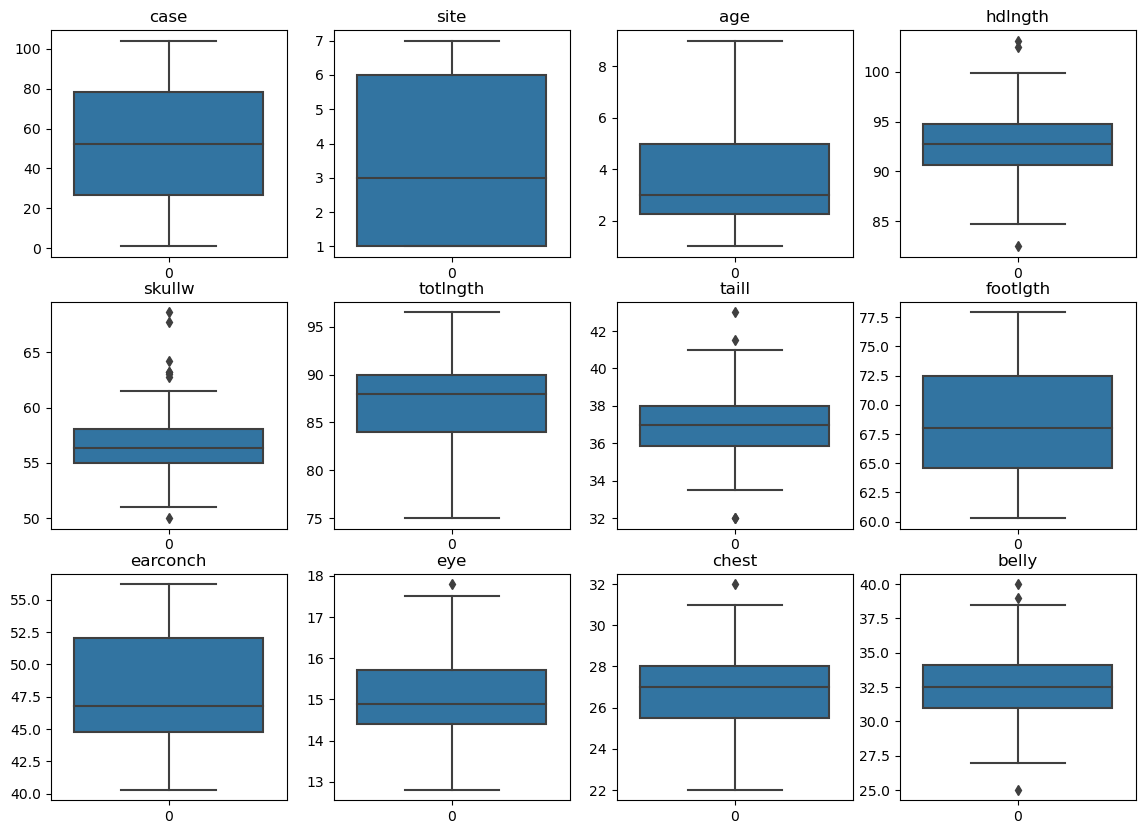

In [7]:
fig, axs = plt.subplots(3,4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(num_var):
    sns.boxplot(df[col],
                ax=axs[i])
    axs[i].set_title(col)


Most distribuitions looks well distributed and just few data outside the normal range

## 3.2. <a id='toc3_2_'></a>[Categorical variables](#toc0_)

In [8]:
df[cat_var].value_counts(sort=False)

Pop    sex
Vic    f      24
       m      22
other  f      19
       m      39
Name: count, dtype: int64

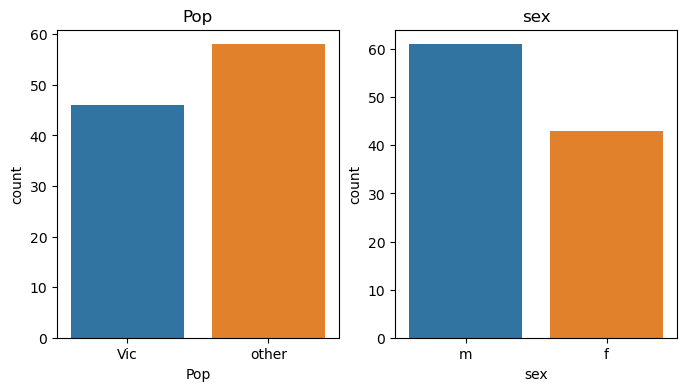

In [9]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs = axs.flatten()

for i, col in enumerate(cat_var):
    sns.countplot(x=df[col],
                  ax=axs[i])
    axs[i].set_title(col)

Categorical atributes look a little unbalanced

# 4. <a id='toc4_'></a>[Bivariate analysis](#toc0_)

c:\Users\ramos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


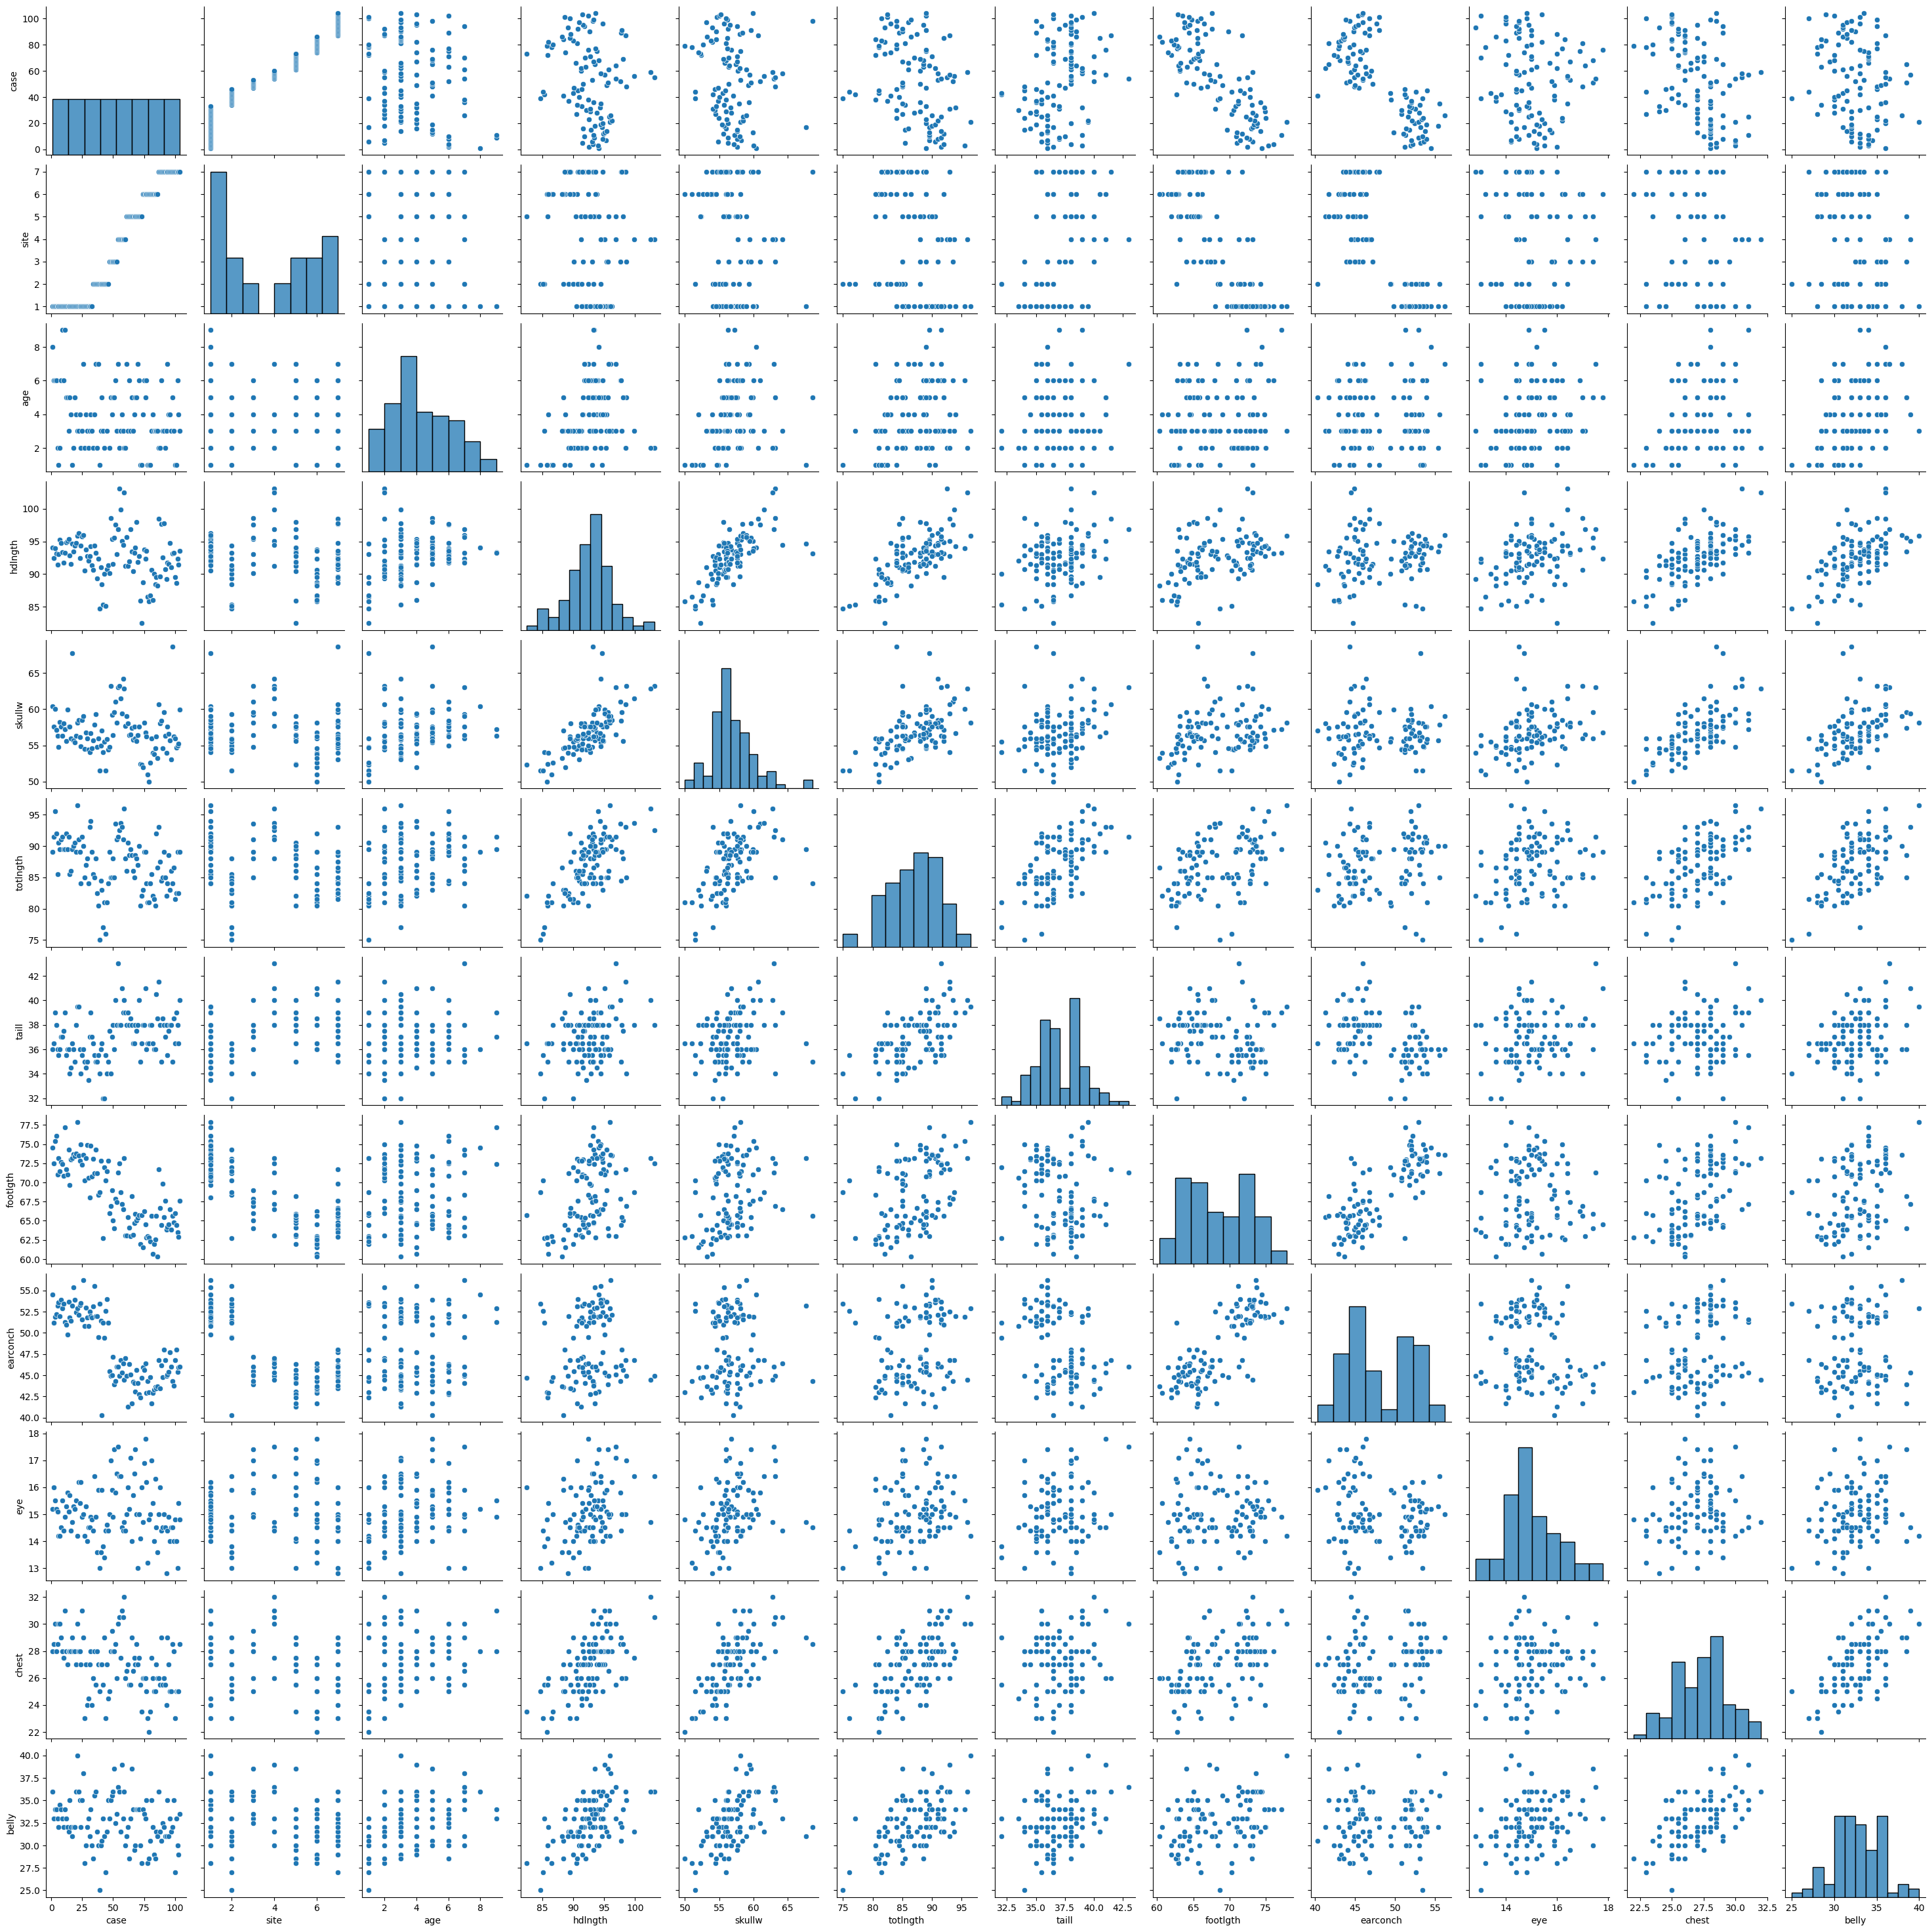

In [10]:
sns.pairplot(df[num_var]);

- The site was splitted by the case
- belly looks well correlated with some variables
- In some cases (case x earconch/tail, tail x earconh, etc) there is a clear division by two groups at the plots, could be this related with 'sex'
- 'hdlngth' seems strongly correlated with 'skullw'

<Axes: >

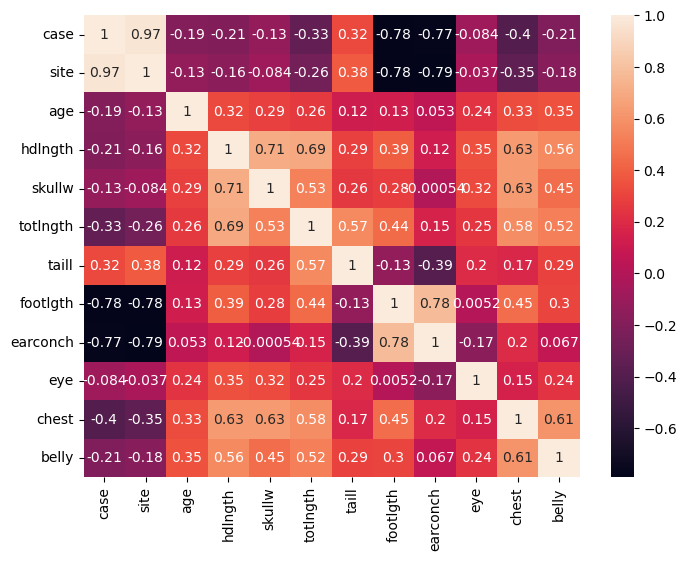

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_var].corr(), annot=True)

Now we can see the strong relationship between hdlngth and other variables like showed in the previous plot.

Case and site seem very correlated with footlngth and earconch, but why? There is some bias in the sample collection? Something about sex or Pop?

# 5. <a id='toc5_'></a>[Multivariate data analysis](#toc0_)

<Axes: xlabel='case', ylabel='site'>

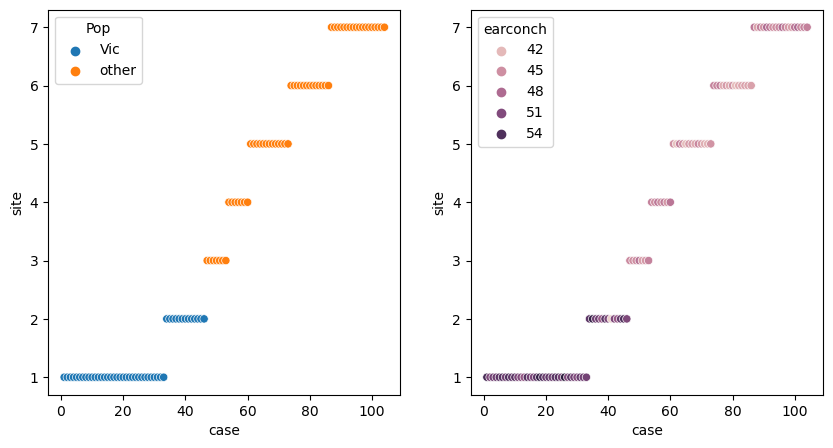

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(data=df,
                x='case',
                y='site',
                hue='Pop',
                ax=axs[0])

sns.scatterplot(data=df,
                x='case',
                y='site',
                hue='earconch',
                ax=axs[1])


As I suposed, there is a bias at the samples about collection and the site with de Pop of the possum.

In the first and second site were collected just Vic species, in other hand, all other species came from sites 3, 4, 5, 6 and 7.

The previous plot show the difference in the earconch size based on the possum collect site and the Pop.

In [13]:
df_grp_pop = df.drop('sex', axis=1).groupby('Pop').mean()
df_grp_sex = df.drop('Pop', axis=1).groupby('sex').mean()

pop_diff = df_grp_pop.loc['Vic'] - df_grp_pop.loc['other']
sex_diff = df_grp_sex.loc['f'] - df_grp_sex.loc['m']

df_diff = pd.DataFrame({'pop_mean_diff':pop_diff, 'sex_mean_diff':sex_diff}, index=pop_diff.index)
df_diff.drop(['case','site'], inplace=True)
df_diff

,pop_mean_diff,sex_mean_diff
age,0.333072,0.247931
hdlngth,-0.009070,-0.774114
skullw,-0.411169,-0.503431
totlngth,0.679460,1.395501
taill,-1.927286,0.162028
footlgth,6.994330,1.102069
earconch,7.273163,0.760351
eye,-0.312744,-0.399848
chest,0.799100,0.574914
belly,0.137181,0.506672


Some attributes have a higher mean variance than others based on the Pop and the sex, but the Pop is significantly higher in some features like footlength and earconch